In [21]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
import csv

%matplotlib inline

In [2]:
df_train = pd.read_csv("../input/training.1600000.processed.noemoticon.csv",
                           sep=',', header=None, error_bad_lines=False, encoding='latin1', quoting=csv.QUOTE_ALL)

In [3]:
df_train.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df_train = df_train[[0, 5]]
df_train.columns = ["label", "text"]
df_train["label"] = df_train["label"] == 0
df_train = shuffle(df_train)
df_train.head()

,label,text
1189681,False,i love the roof by warren st http://bit.ly/HaBPj
802204,False,Another day in work and life. Is it a pigeon d...
994923,False,"@LorettaK totally figures eh! Oh well, it is s..."
1481673,False,@wesbrawner hacked my twitter &amp; facebook
207519,True,Everything is lagging today.


In [6]:
train_input_fn = tf.estimator.inputs.pandas_input_fn(
        df_train, df_train["label"], num_epochs=None, shuffle=True)

In [14]:
df_test = pd.read_csv("../input/testdata.manual.2009.06.14.csv",
                           sep=',', header=None, error_bad_lines=False, encoding='latin1', quoting=csv.QUOTE_ALL)
df_test.head()

,0,1,2,3,4,5
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [15]:
df_test = df_test[[0, 5]]
df_test.columns = ["label", "text"]
df_test = df_test[df_test["label"] != 2]
df_test["label"] = df_test["label"] == 0
df_test = shuffle(df_test)
df_test.head()

,label,text
353,False,Wow everyone at the Google I/O conference got ...
474,True,"dearest @google, you rich bastards! the VISA c..."
91,True,insects have infected my spinach plant :(
462,True,Today is a good day to dislike AT&amp;T. Vote ...
88,True,"North Korea, please cease this douchebaggery. ..."


In [16]:
predict_test_input_fn = tf.estimator.inputs.pandas_input_fn(
        df_test, df_test["label"], shuffle=False)

In [17]:
embedded_text_feature_column = hub.text_embedding_column(
        key="text", 
        module_spec="https://tfhub.dev/google/nnlm-en-dim128/1")

INFO:tensorflow:Using /var/folders/k9/0d1smgqj6f9_hkzf80qfbw80941m76/T/tfhub_modules to cache modules.


In [18]:
estimator = tf.estimator.DNNClassifier(
        hidden_units=[512, 128],
        feature_columns=[embedded_text_feature_column],
        n_classes=2,
        optimizer=tf.train.AdamOptimizer(learning_rate=0.003)
    )


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/k9/0d1smgqj6f9_hkzf80qfbw80941m76/T/tmpqwi5p_u5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x107166da0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [20]:
estimator.train(input_fn=train_input_fn, steps=1000);
test_eval_result = estimator.evaluate(input_fn=predict_test_input_fn)
print("Test set accuracy: {accuracy}".format(**test_eval_result))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/k9/0d1smgqj6f9_hkzf80qfbw80941m76/T/tmpqwi5p_u5/model.ckpt.
INFO:tensorflow:loss = 88.40065, step = 1
INFO:tensorflow:global_step/sec: 247.562
INFO:tensorflo

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/k9/0d1smgqj6f9_hkzf80qfbw80941m76/T/tmpqwi5p_u5/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


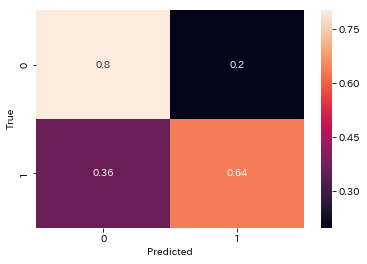

In [22]:
def get_predictions(estimator, input_fn):
      return [x["class_ids"][0] for x in estimator.predict(input_fn=input_fn)]

LABELS = [
    0, 1
]

# Create a confusion matrix on training data.
with tf.Graph().as_default():
    cm = tf.confusion_matrix(df_test["label"], 
                           get_predictions(estimator, predict_test_input_fn))
    with tf.Session() as session:
        cm_out = session.run(cm)

# Normalize the confusion matrix so that each row sums to 1.
cm_out = cm_out.astype(float) / cm_out.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_out, annot=True, xticklabels=LABELS, yticklabels=LABELS);
plt.xlabel("Predicted");
plt.ylabel("True");